## Lab 10 (April 04):
### Vectors and Iterations

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>


  Today, we are going to look at:   
 - [Vectors]()
   + [Atomic Vectors]()
   + [Lists]()
 - [Iterations]()
   + [For Loops]()
   + [While Loops]()
 

<br><br>  

References:
- [R Programming for Data Science](https://bookdown.org/rdpeng/rprogdatascience/)
- [R Cookbook](https://rc2e.com/index.html) 



<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [7]:
library(tidyverse)       
#options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

---

<br> <br>


## **1. Introduction**
**Motivation:** Remember our min-max standardization problem from lab 8? We had the tibble below and we wanted to apply the min-max transformation to all columns of our dataset:

Normalization is defined by: 
$$
x_{scaled} = \dfrac{x - x_{min}}{x_{max} - x_{min}}
$$
<br>  


In [ ]:
## Dataset
df <- tibble(
  a = rnorm(10, 3, 3),
  b = rnorm(10, 8, 2),
  c = rnorm(10, 50, 10),
  d = rnorm(10, 75, 25)
)

## Make copies if raw tibble for future use
df2 <-df1 <- df

print(df)

## apply min-max feature scaling
df$a <- (df$a - min(df$a, na.rm = TRUE)) / 
  (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$b <- (df$b - min(df$b, na.rm = TRUE)) / 
  (max(df$b, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$c <- (df$c - min(df$c, na.rm = TRUE)) / 
  (max(df$c, na.rm = TRUE) - min(df$c, na.rm = TRUE))
df$d <- (df$d - min(df$d, na.rm = TRUE)) / 
  (max(df$d, na.rm = TRUE) - min(df$d, na.rm = TRUE))

<br>

We identified that applying same methodology to different columns of the same type can be boring and time consuming. We saved ourselves by learning about **$functions$** to automate this reptitive task:

In [6]:
## min-max scaler function
min_max_scaler <- function(x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}


<br>
Our task is now simplified:

In [ ]:
## apply to all columns
df$a <- min_max_scaler(x = df$a)
df$b <- min_max_scaler(x = df$b)
df$c <- min_max_scaler(x = df$c)
df$d <- min_max_scaler(x = df$d)

<br>

But there is another problem 🤔: If we had 25 columns in the tibble, would we have to write 25 lines of code to apply the function to all columns? What if we had 100, 1000, 10000? Could we futther simplify our tasks? Yes!😀 But how? With the help of **$Iteration$**. 

<br>   
 
Before we start looking at **iterations**, it is imperative that we review **Vectors**.

<br>    
## **1. Vectors**
There are basically two types of vectors:
- **Atomic** vectors, of which there are six types: logical, integer, double, character, complex, and raw. Integer and double vectors are collectively known as numeric vectors.
- **Lists**, which are sometimes called recursive vectors because lists can contain other lists.

with the differece being that **atomic** vectors are **homogeneous** while **lists** can be **heterogeneous**


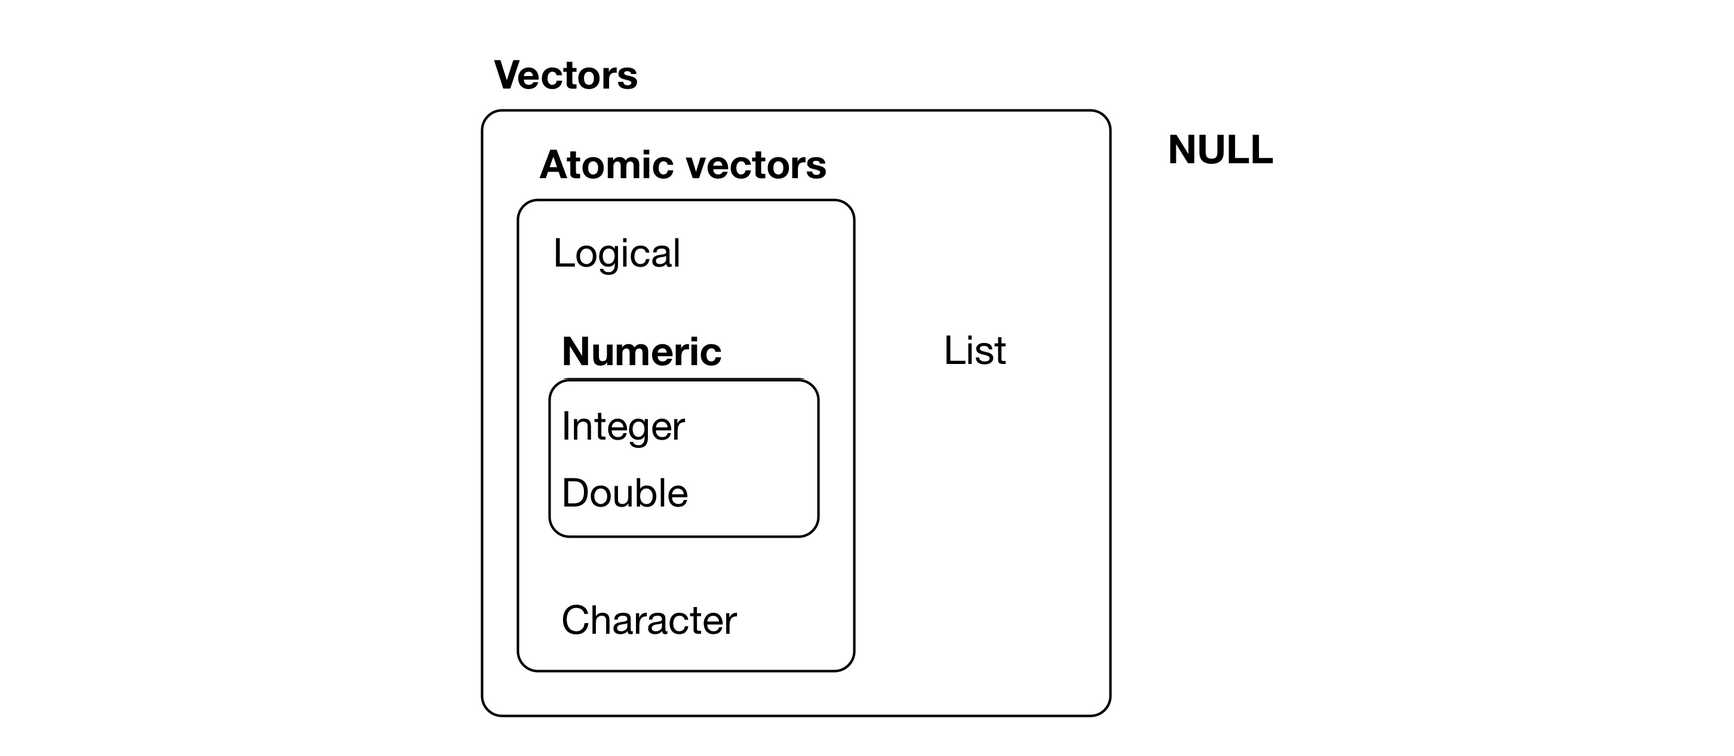

## **1.1 Atomic Vectors**
### **1.1.1 Creation**

**(i) The `c()` function can be used to create vectors of objects by concatenating things together.**

In [ ]:
x <- c(0.5, 0.6)       ## numeric
x <- c(TRUE, FALSE)    ## logical
x <- c(T, F)           ## logical
x <- c("a", "b", "c")  ## character
x <- 9:29              ## integer
x <- c(1+0i, 2+4i)     ## complex

**(ii) You can use `vector`, `seq_along`, `seq_len` to initialize vectors**

In [10]:
## (1) Vector
x <- vector("numeric", length = 10)
x

## OR
x <- numeric(length = 10)

[1] 0 0 0 0 0 0 0 0 0 0

In [12]:
## (2) seq_along
x <- seq_along(along.with = df1) ## df1 has 4 columns so it sequences along the length
x

[1] 1 2 3 4

In [15]:
## (3) seq_len
x <- seq_len(length.out = 5) ## Create a vector of numbers of length in the argument
x

[1] 1 2 3 4 5

### **1.1.2 Naming Vectors**
You can name vectors on-the-fly (while creating them or at a later time:

In [16]:
## (1) On-the-fly
v <- c("Moe" = 10, "Larry" = 20, "Curly" = 30)
v

Moe Larry Curly 
   10    20    30

In [50]:
## (2)
v <- c(10, 20, 30)
names(v) <- c("Moe", "Larry", "Curly")
v

# OR in-placing
v <- c(10, 20, 30)
v <- setNames(nm = c("Moe", "Larry", "Curly"), object = v)
v

Moe Larry Curly 
   10    20    30

Moe Larry Curly 
   10    20    30

### **1.1.3 Subsetting Vectors**
Vectors are basic objects in R and they can be subsetted using the `[` operator.

**(i) Using indices**

In [ ]:
## (1) Using indices

x <- c("a", "b", "c", "c", "d", "a")  
x[1]    ## Extract the first element
x[2]    ## Extract the second element


**(ii) Multiple Subsetting**

In [ ]:
## (2) Multiple Subsetting
x[1:4]         ## As an ordered sequence
x[c(1, 3, 4)]  ## ## Unordered sequence

**(iii) Logical Subsetting**

In [ ]:
## (3) Logical Subsetting
u <- x > "a"
u

In [ ]:

## Now subset based on logical output
x[u]

## Putting it all-in-one
x[x > "a"]

**(iv) Using names**

In [ ]:
## Using names
v <- c("Moe" = 10, "Larry" = 20, "Curly" = 30)
v["Larry"]

## To drop the names use [[
v[["Larry"]]  

<br>   
## **1.2 Lists**
### **1.2.1 Creation**
You can create a list using `list()`. Lists can contain several data types unline atomic vectors

**(i) Creating a simple list**

In [30]:
## Simple list
x <- list(1, "a", TRUE, 1 + 4i) 
x

**(ii) Visualizing Lists**


In [ ]:
## Various list elements
x1 <- list(c(1, 2), c(3, 4))
x1

x2 <- list(list(1, 2), list(3, 4))
x2

x3 <- list(1, list(2, list(3)))
x3

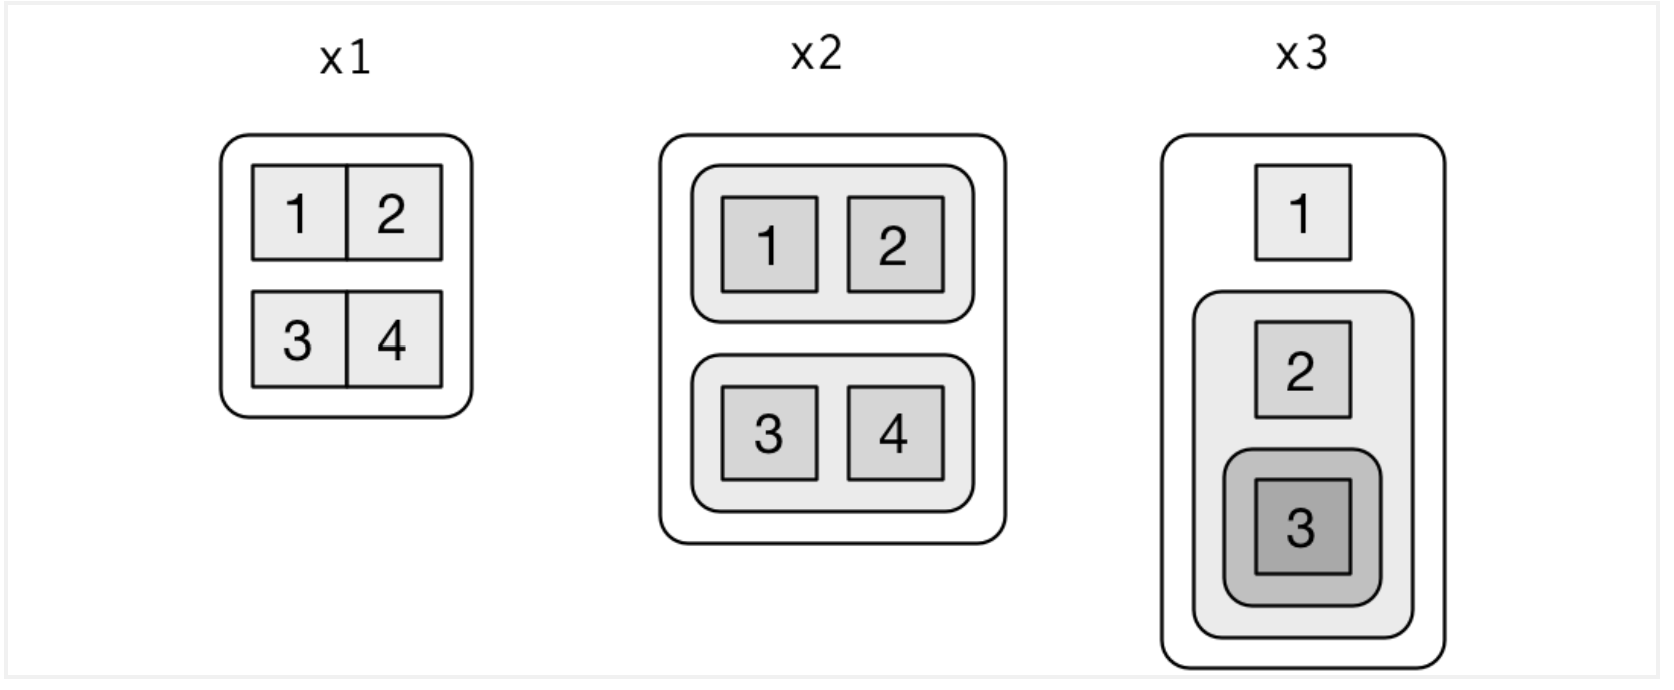

### **1.2.2 Subsetting Lists**
**(i) You can use `[[` to extract elements of a list or `$` if it is a named list**

In [ ]:
## Our list
x <- list(a = 1:4, b = 0.6)
x

In [33]:
## By index
x[[1]]

[1] 1 2 3 4

In [ ]:
## By name
x$a

## OR 
x[["a"]]

**(ii) Subsetting Nested Elements of a List**

In [ ]:
x <- list(a = list(10, 12, 14), b = c(3.14, 2.81))

## (1) Get the 3rd element of the 1st element
x[[c(1, 3)]]  

## OR
## Same as above
x[[1]][[3]]   


**(iii) Extracting Multiple Elements of a List**

In [ ]:
x <- list(a = 1:4, b = 0.6, c = list(2:4))
## Get the last two elements of the list 
print(x[c(2,3)])

## **2. Iteration**
We will now review looping using `for`and `while` 

### **2.1 For Loops**
Syntax:

    for (index in vector) {
       [do something for each index]
    }
  
We explore 3 forms of looping here:
- Looping along the indices of a vector
- Looping along the elements of a vector
- Looping along the length a vector    

**(i) Looping along the indices of a vector** 

In [ ]:
## Let's first look at how indices of a vector appear
for(i in 1:5) {
       print(i)
}

In [ ]:
## Now lets loop along the indices of the vector below
x <- c("a", "b", "c", "d")
n <- length(x)

for(i in 1:n) {
     ## Print out each element of 'x'
     print(x[i])
} 

**(ii) Looping along the elements of a vector**

In [ ]:
x <- c("a", "b", "c", "d")

for(i in x) {
     ## Print out each element of 'x'
     print(i)
} 

**(iii) Looping along the length a vector**

In [ ]:
## Generate a sequence based on length of 'x'
for(i in seq_along(x)) {   
         print(x[i])
}

<br>   
### **2.2 While Loops**
From the last example above, we see that we are long with respect to the lentgth of the vector. However, this may be unknown. When this happens, we can use a special type of loop and iterarte until a **$condition$** is met. This is called a **while** loop.

Syntax:

     <OPTIONALLY INITIALIZING THE ITERATOR>
     while (<condition is true>) {
        [do something]

        <OPTIONALLY INCREMENTING THE ITERATOR>
     }

   

In [ ]:
## What do you think is happening here?

# Initialize
count <- 0

while(count < 10) {
        print(count)
        count <- count + 1 ## increment/update iterator
}

<br><br>
## **3. Exercises**


### **3.1 Applying the min-max transformation to all columns** 
 - Recall our initial motivational problem
 - How would you solve the "repetition" issue using iteration?

In [ ]:
## apply to all columns
df$a <- min_max_scaler(x = df$a)
df$b <- min_max_scaler(x = df$b)
df$c <- min_max_scaler(x = df$c)
df$d <- min_max_scaler(x = df$d)

In [ ]:
## Your code here

<br>   
### **3.2 The Iris dataset** 
- Write a function that computes the number of unique values in each column of a dataset using iteration
- Implement this function on the iris dataset _[Hint: think of employing `length()` and `unique()`]_

In [51]:
## Your code here


<br>   
### **3.3 Monte Carlo Simulation**
- Generate random numbers from $Normal(0, 1)$ and stop when you have more positive values than negatives. 
- Write a function that implements this algortihm and returns number of iterations. The Pseudo-code is given below:

          1. set positive_counter and negative_counter to 0
          2. Generate one sample y ~ Normal(0, 1) i.e rnorm(n = 1, mean = 0, sd = 1)
             2.1 if y > 0 then positive_counter increases by 1
             2.2 else negative_counter increases by 1
          3. Repeat step 2 until positive_counter > negative_counter


In [ ]:
## Your code here

<br>   
### **3.4 Nested Loop**
- How will you use iteration to pring each element of the tibble below?

In [ ]:
## Tibble
x <- tibble(1:2, 3:4, 5:6)
print(x)

In [ ]:
## Your code here

<br>   
### **3.5 Grading Algorithm**:
**_Recall the grading algorithm problem from lab 09_**:


Write a function that accepts two inputs:
- students' exam 1 scores (out of 50 points)
- students' exam 2 scores  ((out of 50 points)

Compute a curved total score as follows
- obtain total exam score from the two exams above (maximum 100 points)
- curve this total score as: $10\sqrt{Total}$

Now assign letter grades for the students as:
- A - 90-100
- B - 80-89
- C - 70-79
- D - 60-69
- Credit - 50-59
- Fail - 49 and below


**Note:** Your overall output should be a `tibble` with columns :
- **ID** (just sequence of natural numbers based on the size of the input data)   
- **Exam 1**
- **Exam 2**
- **Total (curved)** 
- **Grade**

<br>   
**_A solution to this problem is as follows:_**

In [ ]:
## Solution
grader <- function(exam1, exam2){
  ## compute the total scores
  total      <- exam1 + exam2
  curved_tot <- 10*sqrt(total)

  ## Assign letter grades
  grade <- case_when(
     curved_tot >= 90 ~ "A",
     curved_tot >= 80 ~ "B",
     curved_tot >= 70 ~ "C",
     curved_tot >= 60 ~ "D",
     curved_tot >= 50 ~ "Credit",
     TRUE ~ "Fail"  ## If all conditions fail
  )

  ## Now create a tibble for output
  out <- dplyr::tibble(id    = seq_along(exam1),
                       exam1 = exam1,
                       exam2 = exam2,
                       total = curved_tot,
                       grade = grade
                       )
  out
}


## Test the function
## Data
x <- sample(size = 20, x = 1:50, replace = TRUE)
y <- sample(size = 20, x = 1:50, replace = TRUE)

grader(exam1 = x, exam2 = y)

- **Question: How would you use `if-else-if` and iteratio to solve this problem?**

In [ ]:
## Your code here